### Generate Training and Test Data
For this project, we are using multiple different datasets, most of them from Kaggle. This notebook parses and aggregates all the different data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir("C:\\Users\\garim\\Downloads\\Portfolio_ML\\emotional_classification\\")

#### 1. Emotion Classification NLP

<u>Link</u>: https://www.kaggle.com/datasets/anjaneyatripathi/emotion-classification-nlp/data

In [5]:
data_1 = pd.concat([pd.read_csv("data/data_1/emotion-labels-" + ll + ".csv") for ll in ['train', 'test', 'val']]).reset_index(drop= True)
data_1['source_id'] = 1

print("Total Rows: " + str(data_1.shape[0]))
data_1.head()

Total Rows: 7102


,text,label,source_id
0,Just got back from seeing @GaryDelaney in Burs...,joy,1
1,Oh dear an evening of absolute hilarity I don'...,joy,1
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,1
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,1
4,I feel so blessed to work with the family that...,joy,1


#### Emotions dataset for NLP

<u>Link</u>: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp?select=train.txt

In [6]:
data_2 = pd.concat([pd.read_csv("data/data_2/" + ll + ".txt", sep= ";", header= None) for ll in ['train', 'test', 'val']]).reset_index(drop= True)
data_2.columns= ['text','label']
data_2['source_id'] = 2

print("Total Rows: " + str(data_2.shape[0]))
data_2.head()

Total Rows: 20000


,text,label,source_id
0,i didnt feel humiliated,sadness,2
1,i can go from feeling so hopeless to so damned...,sadness,2
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,2
4,i am feeling grouchy,anger,2


#### Emotions

<u>Link</u>: https://www.kaggle.com/datasets/nelgiriyewithana/emotions

In [7]:
data_3 = pd.read_csv("data/data_3/text.csv", usecols= ["text","label"])
emotion_map = {0:'sadness', 1:'joy', 2:'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
data_3['label'] = data_3['label'].map(emotion_map)
data_3['source_id'] = 3

print("Total Rows: " + str(data_3.shape[0]))
data_3.head()

Total Rows: 416809


,text,label,source_id
0,i just feel really helpless and heavy hearted,fear,3
1,ive enjoyed being able to slouch about relax a...,sadness,3
2,i gave up my internship with the dmrg and am f...,fear,3
3,i dont know i feel so lost,sadness,3
4,i am a kindergarten teacher and i am thoroughl...,fear,3


#### Aggregate all data

In [8]:
data = pd.concat([data_1, data_2, data_3]).reset_index(drop= True)
print("Total Rows: " + str(data.shape[0]))

Total Rows: 443911


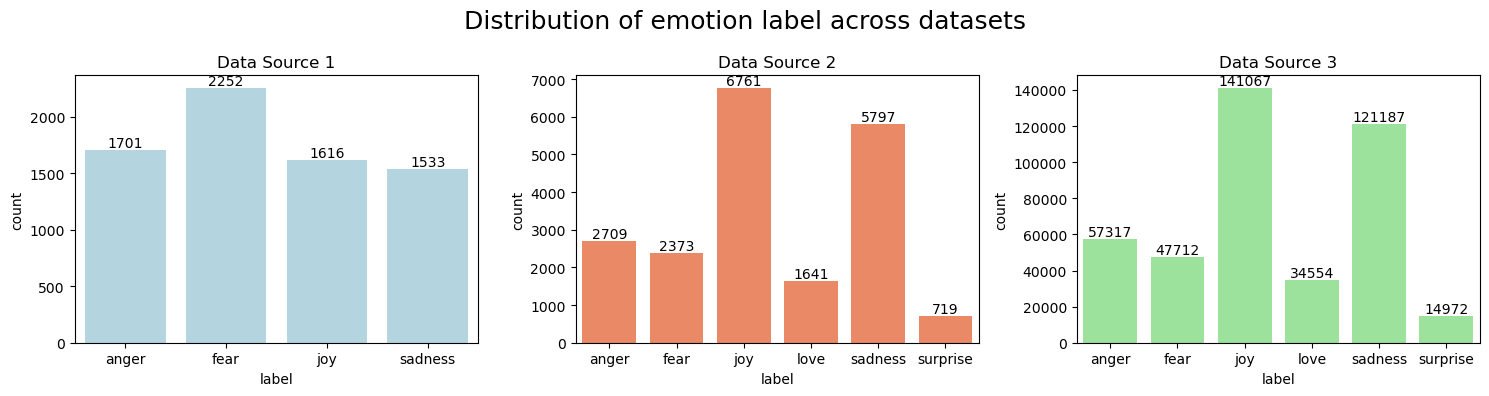

In [50]:
fig, axs = plt.subplots(figsize = (15,4), ncols= 3)
plt.suptitle("Distribution of emotion label across datasets", fontsize= 18)

emotions_order = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

val_count_1 = data_1['label'].value_counts(normalize= False, ascending= False).reindex(emotions_order).dropna()
sns.countplot(data= data_1, x= "label", color= "lightblue", order= val_count_1.index.tolist(), ax= axs[0]);
axs[0].bar_label(container= axs[0].containers[0], labels= [str(int(nn)) for nn in val_count_1])
axs[0].set_title("Data Source 1");

val_count_2 = data_2['label'].value_counts(normalize= False, ascending= False).reindex(emotions_order).dropna()
sns.countplot(data= data_2, x= "label", color= "coral", order= val_count_2.index.tolist(), ax= axs[1]);
axs[1].bar_label(container= axs[1].containers[0], labels= [str(int(nn)) for nn in val_count_2])
axs[1].set_title("Data Source 2");

val_count_3 = data_3['label'].value_counts(normalize= False, ascending= False).reindex(emotions_order).dropna()
sns.countplot(data= data_3, x= "label", color= "lightgreen", order= val_count_3.index.tolist(), ax= axs[2]);
axs[2].bar_label(container= axs[2].containers[0], labels= [str(int(nn)) for nn in val_count_3])
axs[2].set_title("Data Source 3");

plt.tight_layout()
fig.savefig("images/data_by_source.png")

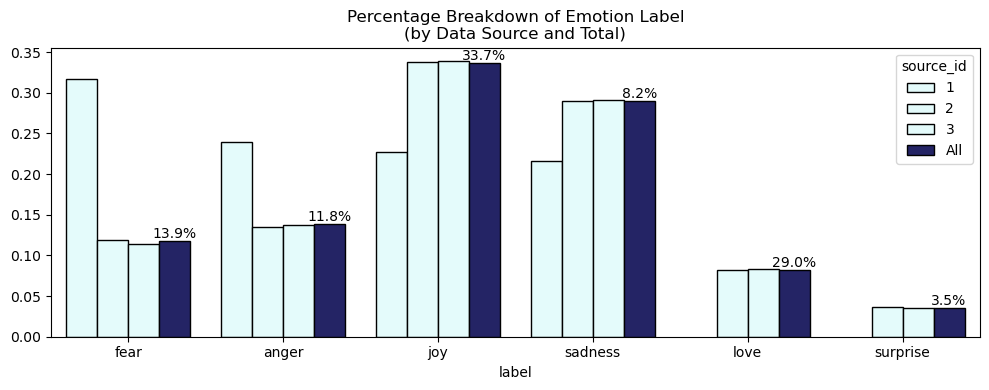

In [12]:
dt_pct = data['label'].groupby(data['source_id']).value_counts(normalize= True).reset_index()
dt_pct = pd.concat([dt_pct, data['label'].value_counts(normalize= True).reset_index().eval('source_id = 999')])
dt_pct['source_id'] = dt_pct['source_id'].replace(999, 'All')

fig,ax = plt.subplots(figsize= (10,4), ncols= 1)
# sns.color_palette("flare", as_cmap=True)
my_palette = { ss:'midnightblue' if ss=='All' else 'lightcyan' for ss in dt_pct.source_id.unique()}
sns.barplot(data= dt_pct, x= "label", y= "proportion", hue= "source_id", ax= ax, edgecolor= 'black', palette= my_palette);
ax.set_title("Percentage Breakdown of Emotion Label\n(by Data Source and Total)");
ax.bar_label(container= ax.containers[3], labels= [str(np.round(100*nn,1))+"%" for nn in 
                                   dt_pct.query('source_id == "All"').set_index('label').reindex(emotions_order).proportion]);
ax.set_ylabel(None);
plt.tight_layout()

In [17]:
dt = data['label'].value_counts(normalize= True).sort_index()
dt

label
anger       0.139053
fear        0.117900
joy         0.336653
love        0.081537
sadness     0.289511
surprise    0.035347
Name: proportion, dtype: float64

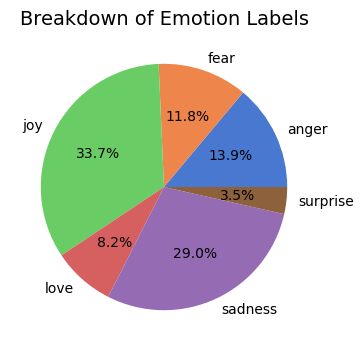

In [63]:
fig,ax = plt.subplots(figsize= (4,4))
plt.pie(dt.values, labels= dt.index, colors= sns.color_palette('muted'), autopct= '%.1f%%');
plt.title("Breakdown of Emotion Labels", fontsize= 14);
fig.savefig("images/pct_emotions_final_data.png")

### Split Data into Development and Validation Sets

Set aside 25% of the data as validation set, which we will not look at while building the model. The remaining 75% is the development data, which may be further split into training and test sets when we build our classification models.

In [188]:
df_dev, df_val = train_test_split(data.drop(["source_id"], axis= 1), random_state= 42, test_size= 0.25, shuffle= True, stratify= data['label'])

print("No. of rows in development data: " + str(df_dev.shape[0]))
print("No. of rows in validation data: " + str(df_val.shape[0]))

No. of rows in development data: 332933
No. of rows in validation data: 110978


In [189]:
df_dev.to_csv("data/dev_data.csv", index= None)
df_val.to_csv("data/val_data.csv", index= None)
print("Written 'dev_data.csv' and 'val_data.csv' to data/ folder")

Written 'dev_data.csv' and 'val_data.csv' to data/ folder
